# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

In [1]:
import numpy as np

def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

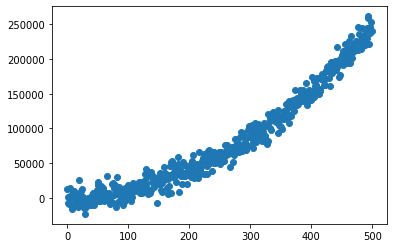

In [2]:
import matplotlib.pyplot as plt

yvalues = []
xvalues = []
for i in range(0,500):
    xvalues.append(i)
    yvalues.append(curve_generator(i,10000))
    
    
plt.scatter(xvalues,yvalues)

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

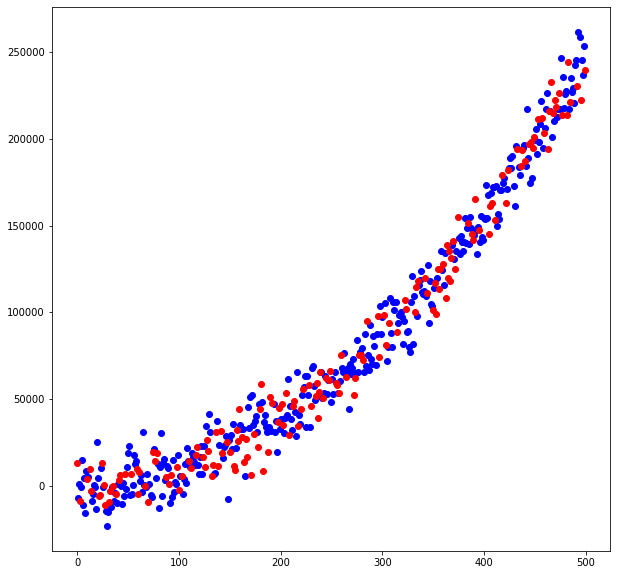

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(xvalues, yvalues, train_size=0.66, test_size=0.33, random_state=30)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.scatter(x_train,y_train, c = 'blue', norm = 'log')
plt.scatter(x_test, y_test, c = 'red', norm = 'log')

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

[251.98959583033187, 133.0861610843672, 87.88146860447449, 88.3624685851022, 88.41508036134226, 88.2648185248181, 88.63569929990223, 88.89335454126031, 88.9075852590413, 88.89971140428956, 88.73112049006563, 88.75790681484321, 88.81161770271254, 89.42144764351461, 89.62600016326599, 89.50190704817409, 89.35813742397853, 89.21292832731929, 89.2477719201732, 89.13897458833577, 89.2176177848894]


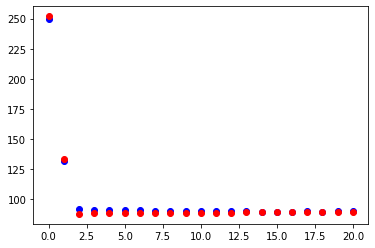

<Figure size 720x720 with 0 Axes>

In [8]:
from sklearn.linear_model import LinearRegression
# Of the final plot, in the x-axis is the degree of the polynomial regression, and the y axis is the training and test set error (RMSE-value). 

coefficient = []
trainError = []
testError = []
polynomialDegree = []

for i in range(0,21):
    temp = 0
    trainFit = np.polyfit(x_train, y_train, deg = i, full = True)
    coefficient.append(trainFit[0])
    polynomialDegree.append(i)
    
    for a in range(0, len(x_train)):
        val = np.polyval(coefficient[i], x_train[a])     
        temp = temp + (abs(val - y_train[a]))

    trainError.append((temp/len(x_train))**(0.5))

for i in range(0,21):
    temp = 0
    for b in range(0, len(x_test)):
        val = np.polyval(coefficient[i], x_test[b])
        temp = temp + (abs(val - y_test[b]))

    testError.append((temp/len(x_test))**(1/2))

print(testError)

plt.scatter(polynomialDegree, trainError, c='blue')
plt.scatter(polynomialDegree, testError, c='red')
    
    
fig2 = plt.figure()
fig2.set_figheight(10)
fig2.set_figwidth(10)

In [ ]:
#We can observe here that there is a drastic decline in rmse as we increase our polynomial defree from 0 to 2.5 and then it plateaus. 
#Polynomial regression is a method to determine the relationship between an independent variable (x) and a dependent variable (y) 
#That is what we are doing here and modelling their relationship as the nth degree polynomial.
#We can also see that if we were to use lower polynomial degrees, we would get high test and training set errors, 
#but it doesn't matter as long as the polynomial degree is atleast more than 2. 
#Another thing to note is that the test error actually drops below the train error after n ~ 2.5, which is great for us!


**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

In [21]:
#degree of polynomial
coefficient1 = []
coefficient2 = []
coefficient5 = []
coefficient10 = []

# to store train error for degree 1
error_train1 = []
# to store train error for degree 2
error_train2 = []
# to store train error for degree 5
error_train5 = []
# to store train error for degree 10
error_train10 = []


arr = []

for i in range(2, 11):
    s=(1/i)
    arr.append(s)
    
    x_train, x_test, y_train, y_test = train_test_split(xvalues, yvalues, test_size=s, random_state=30)

    #for n=1
    lst1 = np.polyfit(x_train, y_train, 1, full=True)
    coefficient1.append(lst1[0])
    temp1 = 0

    for j in range(0, len(x_train)):
        value1 = np.polyval(coefficient1[i-2], x_train[j])
        temp1 = temp1 + (abs(value1-y_train[j]))
    error_train1.append((temp1/len(x_train))**(1/2))
    
    #for n=2
    lst2 = np.polyfit(x_train, y_train, 2, full=True)
    coefficient2.append(lst2[0])
    temp2 = 0

    for j in range(0, len(x_train)):
        value2 = np.polyval(coefficient2[i-2], x_train[j])
        temp2 = temp2 + (abs(value2-y_train[j]))
    error_train2.append((temp2/len(x_train))**(1/2))
        
    #for n=5    
    lst5 = np.polyfit(x_train, y_train, 5, full=True)
    coefficient5.append(lst5[0])
    temp5 = 0

    for j in range(0, len(x_train)):
        value5 = np.polyval(coefficient5[i-2], x_train[j])
        temp5 = temp5 + (abs(value5-y_train[j]))
    error_train5.append((temp5/len(x_train))**(1/2))
        
    lst10 = np.polyfit(x_train, y_train, 10, full=True)
    coefficient10.append(lst10[0])
    temp10 = 0

    for j in range(0, len(x_train)):
        value10 = np.polyval(coefficient10[i-2], x_train[j])
        temp10 = temp10 + (abs(value10-y_train[j]))
    error_train10.append((temp10/len(x_train))**(1/2))
        

In [22]:
# to store test error for each degree
error_test1 = []
error_test2 = []
error_test5 = []
error_test10 = []

for i in range(0, len(coefficient1)):
    temp1 = 0
    temp2 = 0
    temp5 = 0
    temp10 = 0
    for j in range(0, len(x_test)):
            val1 = np.polyval(coefficient1[i], x_test[j])
            temp1 = temp1 + (abs(val1-y_test[j]))
            val2 = np.polyval(coefficient2[i], x_test[j])
            temp2 = temp2 + (abs(val2-y_test[j]))
            val5 = np.polyval(coefficient5[i], x_test[j])
            temp5 = temp5 + (abs(val5-y_test[j]))
            val10 = np.polyval(coefficient10[i], x_test[j])
            temp10 = temp10 + (abs(val10-y_test[j]))
    error_test1.append((temp1/len(x_test))**(0.5))
    error_test2.append((temp2/len(x_test))**(0.5))
    error_test5.append((temp5/len(x_test))**(0.5))
    error_test10.append((temp10/len(x_test))**(0.5))

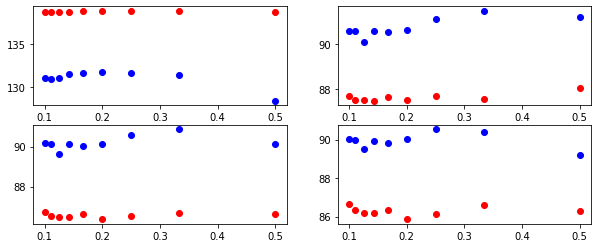

In [23]:
#visualizations
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
ax1 = plt.subplot(2,2,1)
plt.scatter(arr, error_train1, c='blue')
plt.scatter(arr, error_test1, c='red')
ax2 = plt.subplot(2,2,2)
plt.scatter(arr, error_train2, c='blue')
plt.scatter(arr, error_test2, c='red')
ax3 = plt.subplot(2,2,3)
plt.scatter(arr, error_train5, c='blue')
plt.scatter(arr, error_test5, c='red')
ax4 = plt.subplot(2,2,4)
plt.scatter(arr, error_train10, c='blue')
plt.scatter(arr, error_test10, c='red')

In [ ]:
# As before, higher polynomial degree - more than 2, is resulting in much lower rmse values and after n=2, the test error is lower than train error. 
# We can also see that changing the training set size doesn't have any significant impacts and it's rather the polynomial degree that makes a difference
# We can certainly see that there are changes in rmse with changes in training set size but nothing significant is observed.

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

In [ ]:
#modified notebook4 submitted as a seperate notebook

**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>